Q1a. Print all the predictor variables and dependent variables in the given
dataset (Machine.csv)

In [5]:
import pandas as pd
data = pd.read_csv('Machine.csv')
predictor_variables=data["Operating_hours"]
predictor_variables

0     3
1     5
2     9
3     7
4    11
5    15
6     4
7    18
Name: Operating_hours, dtype: int64

In [6]:
dependent_variables=data["Output"]
dependent_variables

0     5
1     8
2     8
3     7
4     9
5    12
6     6
7    22
Name: Output, dtype: int64

Q1b. Understand the relationship between each predictor variable and the
dependent variable; draw the plot.

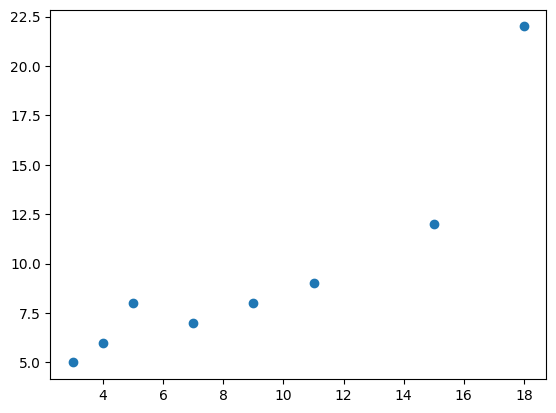

In [7]:
import matplotlib.pyplot as plt
plt.scatter(predictor_variables,dependent_variables)
plt.show()

Q1c. Implement linear regression algorithm with gradient descent
optimization. Print the regression parameters after 2 epochs of training.
Predict the output of the manufacturing if the machine runs for 13 hours.
Also print the error of your regression model.

In [ ]:
import numpy as np
theta0=0.0
theta1=0.0
learning_rate=0.01
epochs=2;

for epoch in range(epochs):
  predictions=theta0+theta1*predictor_variables
  error=predictions- dependent_variables
  theta0-= learning_rate*np.mean(error)
  theta1-= learning_rate*np.mean(error*predictor_variables)

print("Theta0: ",theta0)
print("Theta1: ",theta1)
print("Output for 13 hours: ",theta0+ theta1*13)
predictions=theta0+theta1* predictor_variables
error=np.mean((predictions-dependent_variables)**2)
print("Error:",error)

Theta0:  0.0931
Theta1:  1.016728125
Output for 13 hours:  13.310565624999999
Error: 5.72050677576416


Q1d. Change the epochs and print the change in the model performance.


In [ ]:
import numpy as np
theta0=0.0
theta1=0.0
learning_rate=0.01
epochs=10;
for epoch in range(epochs):
  predictions=theta0+theta1*predictor_variables
  error=predictions- dependent_variables
  theta0-= learning_rate*np.mean(error)
  theta1-= learning_rate*np.mean(error*predictor_variables)
print("Theta0: ",theta0)
print("Theta1: ",theta1)
print("Output for 13 hours: ",theta0+ theta1*13)
predictions=theta0+theta1* predictor_variables
error=np.mean((predictions-dependent_variables)**2)
print("Error:",error)

Theta0:  0.1201585899956336
Theta1:  1.0194967941947273
Output for 13 hours:  13.373616914527087
Error: 5.699941896472225


Q2a. Print all the predictor variables and dependent variables in the given
dataset (housePrice_small.csv)


In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv("housePrice_small.csv")
print("Predictor variables:")
print(df.columns[:-1])
print("\nDependent variable:")
print(df.columns[-1])



Predictor variables:
Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea',
       'GarageArea'],
      dtype='object')

Dependent variable:
SalePrice


Q2b. Understand the relationship between each predictor variable and the
dependent variable; Use heatmap to understand correlation between the
dependent and independent variables.

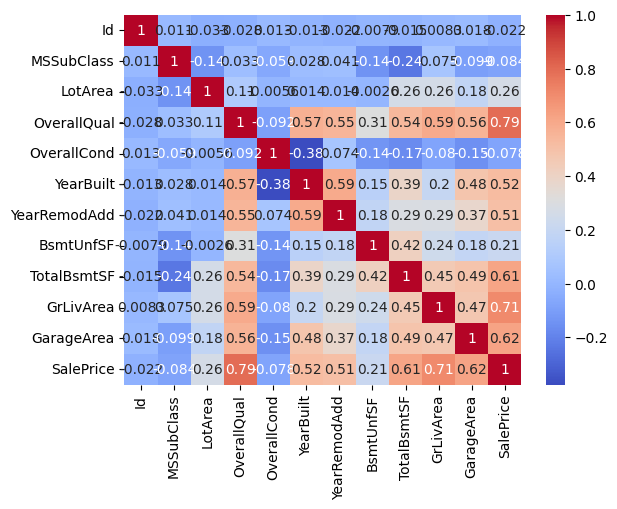

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("housePrice_small.csv")
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

Q2c. Keep 80% of samples for training and rest for testing

In [27]:
from sklearn.model_selection import train_test_split
data = pd.read_csv("housePrice_small.csv")
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train:\n", X_train)
print("X_test:\n", X_test)
print("y_train:\n", y_train)
print("y_test:\n", y_test)


X_train:
         Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
254    255          20     8400            5            6       1957   
1066  1067          60     7837            6            7       1993   
638    639          30     8777            5            7       1910   
799    800          50     7200            5            7       1937   
380    381          50     5000            5            6       1924   
...    ...         ...      ...          ...          ...        ...   
1095  1096          20     9317            6            5       2006   
1130  1131          50     7804            4            3       1928   
1294  1295          20     8172            5            7       1955   
860    861          50     7642            7            8       1918   
1126  1127         120     3684            7            5       2007   

      YearRemodAdd  BsmtUnfSF  TotalBsmtSF  GrLivArea  GarageArea  
254           1957        392         1314       1314    

Q2d.  Print the regression parameters after training

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Regression coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Regression coefficients: [-2.31310945e+00 -1.71058680e+02  4.93705718e-01  2.13704299e+04
  3.36908934e+03  3.61662782e+02  2.59680896e+02 -1.75135482e+01
  2.19036464e+01  5.05762461e+01  3.78777833e+01]
Intercept: -1298875.832395063


Q2e.  Show the accuracy on the test set


In [37]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 1458343297.1273088
